In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper
import fc_model

In [3]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|████████████████████████████████████████████████████████████████▉| 26378240/26421880 [00:11<00:00, 1335857.32it/s]

Extracting F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to F_MNIST_data/FashionMNIST\raw



0it [00:00, ?it/s]
  0%|                                                                                        | 0/29515 [00:00<?, ?it/s]
32768it [00:00, 52514.94it/s]                                                                                          

Extracting F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to F_MNIST_data/FashionMNIST\raw



0it [00:00, ?it/s]
 88%|███████████████████████████████████████████████████████████▏       | 3907584/4422102 [00:01<00:00, 9256934.26it/s]
4423680it [00:01, 2313353.50it/s]                                                                                      

Extracting F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to F_MNIST_data/FashionMNIST\raw



0it [00:00, ?it/s]
  0%|                                                                                         | 0/5148 [00:00<?, ?it/s]
8192it [00:00, 36305.88it/s]                                                                                           

Extracting F_MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to F_MNIST_data/FashionMNIST\raw
Processing...
Done!


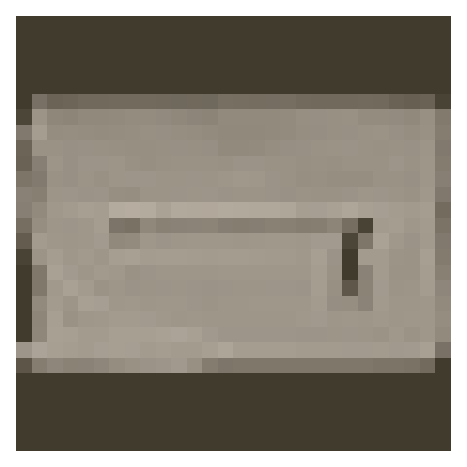

26427392it [00:30, 1335857.32it/s]                                                                                     

In [4]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [5]:
model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [6]:
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 1.477..  Test Loss: 0.845..  Test Accuracy: 0.700
Epoch: 1/2..  Training Loss: 0.966..  Test Loss: 0.755..  Test Accuracy: 0.716
Epoch: 1/2..  Training Loss: 0.877..  Test Loss: 0.673..  Test Accuracy: 0.747
Epoch: 1/2..  Training Loss: 0.816..  Test Loss: 0.638..  Test Accuracy: 0.762
Epoch: 1/2..  Training Loss: 0.802..  Test Loss: 0.654..  Test Accuracy: 0.745
Epoch: 1/2..  Training Loss: 0.787..  Test Loss: 0.636..  Test Accuracy: 0.772
Epoch: 1/2..  Training Loss: 0.771..  Test Loss: 0.645..  Test Accuracy: 0.753
Epoch: 1/2..  Training Loss: 0.780..  Test Loss: 0.609..  Test Accuracy: 0.768
Epoch: 1/2..  Training Loss: 0.805..  Test Loss: 0.612..  Test Accuracy: 0.789
Epoch: 1/2..  Training Loss: 0.752..  Test Loss: 0.599..  Test Accuracy: 0.790
Epoch: 1/2..  Training Loss: 0.739..  Test Loss: 0.649..  Test Accuracy: 0.771
Epoch: 1/2..  Training Loss: 0.742..  Test Loss: 0.640..  Test Accuracy: 0.780
Epoch: 1/2..  Training Loss: 0.756..  Test Loss: 0.5

In [7]:
print('Our model :\n \n', model, '\n')
print('the state dict keysL \n\n', model.state_dict().keys())

Our model :
 
 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
) 

the state dict keysL 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [8]:
torch.save(model.state_dict(), 'checkpoint.pth')

In [9]:
state_dict= torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


## load state dict to network 

In [10]:
model.load_state_dict(state_dict)

<All keys matched successfully>

In [11]:
# Try this
model = fc_model.Network(784, 10, [400, 200, 100])
# This will throw an error because the tensor sizes are wrong!
model.load_state_dict(state_dict)

RuntimeError: Error(s) in loading state_dict for Network:
	size mismatch for hidden_layers.0.weight: copying a param with shape torch.Size([512, 784]) from checkpoint, the shape in current model is torch.Size([400, 784]).
	size mismatch for hidden_layers.0.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([400]).
	size mismatch for hidden_layers.1.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([200, 400]).
	size mismatch for hidden_layers.1.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([200]).
	size mismatch for hidden_layers.2.weight: copying a param with shape torch.Size([128, 256]) from checkpoint, the shape in current model is torch.Size([100, 200]).
	size mismatch for hidden_layers.2.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([100]).
	size mismatch for output.weight: copying a param with shape torch.Size([10, 128]) from checkpoint, the shape in current model is torch.Size([10, 100]).

In [13]:
checkpoint={
    'input_size':784,
    'ouput_layers':10,
    'hidden_layers':[each.out_features for each in model.hidden_layers],
    'state_dict':model.state_dict()
}

torch.save(checkpoint, 'checkpoint.pth')

## writing a fucntion to loade checkpoint

In [26]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [27]:
model = load_checkpoint('checkpoint.pth')
print(model)

KeyError: 'output_size'